In [1]:
# 이번 프로젝트에서 사용할 데이터 이름은 fraud.csv입니다.
# 신용카드 이상감지 모델을 만들기 위한 데이터이며, is_fraud가 사기거래 여부를 나타내는 변수입니다.
# 이전 노드에서 배운 내용을 모두 동원하여, 최종적으로 사기거래 여부를 예측하기 위한 데이터를 준비해보세요.

In [2]:
# trans_date_trans_time	구매 날짜와 시간
# cc_num	신용카드 번호(credit card number)
# merchant	구매 상점 이름
# category	구매 상점 분류
# amt	구매 금액
# first	카드 소지자 이름
# last	카드 소지자 성
# gender	카드 소지자 성별
# street	카드 소지자의 주소
# city	카드 소지자의 주소
# state	카드 소지자의 주소
# zip	카드 소지자의 주소 (우편번호)
# lat	카드 소지자의 주소 위도
# long	카드 소지자의 주소 경도
# city_pop	카드 소지자의 지역 인구수
# job	고객의 직업
# dob	고객의 생년 월일
# trans_num	거래 id
# unix_time	유닉스 형식 구매 날짜와 시간
# merch_lat	상점의 위도
# merch_long	상점의 경도
# is_fraud	사기거래 여부

In [3]:
# 평가 기준
# 1. 사기거래 탐지에 필요한 컬럼만 선정함
# 2. 구매 금액, 시간, 거리에 대한 피쳐 엔지니어링을 진행함
# 3. 필요한 컬럼을 모두 수치형으로 인코딩함
# 4. 데이터 전처리 과정에 대한 자세한 설명과 함께 코드를 작성함
# 5. 정해진 기간 (~1월 13일 23:59) 내에 제출함

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
cc_df = pd.read_csv('/aiffel/data/fraud.csv')

In [6]:
pd.set_option('display.max_columns', 50)

In [7]:
# 데이터프레임 개괄적으로 살펴보자
cc_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0


In [8]:
# cc_df의 컬럼명과 자료형을 확인해보자
cc_df.info()

# 역시 금융권 데이터라 그런가 결측치가 없다!!!!!!!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  491134 non-null  object 
 1   cc_num                 491134 non-null  int64  
 2   merchant               491134 non-null  object 
 3   category               491134 non-null  object 
 4   amt                    491134 non-null  float64
 5   first                  491134 non-null  object 
 6   last                   491134 non-null  object 
 7   gender                 491134 non-null  object 
 8   street                 491134 non-null  object 
 9   city                   491134 non-null  object 
 10  state                  491134 non-null  object 
 11  zip                    491134 non-null  int64  
 12  lat                    491134 non-null  float64
 13  long                   491134 non-null  float64
 14  city_pop               491134 non-nu

In [9]:
# cc_df의 컬럼별 통계량을 확인해보자

cc_df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,4.911340e+05,491134.000000,491134.000000,491134.000000,491134.000000,4.911340e+05,4.911340e+05,491134.000000,491134.000000,491134.000000
mean,3.706013e+17,69.050120,50770.532384,37.931230,-90.495619,1.213922e+05,1.358730e+09,37.930272,-90.495411,0.002533
std,1.260229e+18,160.322867,26854.947965,5.341193,12.990732,3.725751e+05,1.819402e+07,5.372986,13.004100,0.050264
min,5.038744e+11,1.000000,1843.000000,24.655700,-122.345600,4.600000e+01,1.325376e+09,23.655789,-123.345106,0.000000
25%,2.131124e+14,8.960000,28405.000000,33.746700,-97.235100,1.228000e+03,1.343087e+09,33.781388,-96.984814,0.000000
50%,3.531130e+15,42.170000,49628.000000,38.507200,-87.591700,5.760000e+03,1.357257e+09,38.545124,-87.573441,0.000000
75%,4.653879e+15,80.330000,75048.000000,41.520500,-80.731000,5.083500e+04,1.374626e+09,41.624294,-80.685567,0.000000
max,4.956829e+18,25086.940000,99323.000000,48.887800,-69.965600,2.906700e+06,1.388534e+09,49.887523,-68.965624,1.000000


In [10]:
# 유지 & 제거해야할 컬럼 생각해보기

# 남길 컬럼
# trans_date_trans_time : 거래 시간 정보는 필수적
# cc_num : 고객 id 식별자 개념으로 남기자 (머신러닝에는 돌리지 말고)
# category :상점의 업종에 따른 인사이트 도출이 가능해보임 (동네 식당에서 수천만원 넘는 금액 긁을 수 없으니)
# amt :구매 금액 정보는 필수적
# gender : 카드 소지자 성별에 따른 인사이트 도출이 가능해보임 (성별에 따른 소비 패턴?)
# lat : 카드 소지자의 주소 위도 (위도/경도로 소지자 주소 대표)
# long : 카드 소지자의 주소 경도 (위도/경도로 소지자 주소 대표)
# city_pop : 카드 소지자의 지역 인구수에 따른 인사이트 도출 가능해보임 (대도시냐 소도시냐에 따른 소비패턴?)
# dob : 고객의 생년 월일 (연령대로 이상거래 추측 가능)
# merch_lat :상점의 위도 (소지자 위치와 비교해 거리 측정 가능)
# merch_long : 상점의 경도 (소지자 위치와 비교해 거리 측정 가능)
# is_fraud : 사기거래 여부  (종속 변수!!)

In [11]:
# 제거할 컬럼

# merchant : 구매 상점 이름은 분석에 필요 없음
# first : 카드번호로 고객 id 지정했으니 no 필요
# last : 카드번호로 고객 id 지정했으니 no 필요
# street : 카드소지자의 위도/경도로 위치 지정하기로 했으니 no 필요
# city : 카드소지자의 위도/경도로 위치 지정하기로 했으니 no 필요
# state : 카드소지자의 위도/경도로 위치 지정하기로 했으니 no 필요
# zip : 카드소지자의 위도/경도로 위치 지정하기로 했으니 no 필요
# job : 고객의 직업은 소득 수준에 참고는 될 수 있지만,
# 이상거래 탐지에 직접적인 인과관계가 없을 가능성이 높고, 굳이 해석에 혼란만 줄 수 있으니 빼버리자.
# trans_num : 거래 id는 분석에 크게 필요 없을듯
# unix_time : trans_date_trans_time 컬럼 있으니 중복 제거

In [12]:
# 불필요한 컬럼 드롭 시켜버리기

cc_df.drop(['merchant','first','last','street','city','state','zip','job','trans_num','unix_time'], axis = 1, inplace= True)

In [13]:
#  그럼 다시 데이터를 살펴보자

cc_df.info()

# 자료형을 보니까... 
# 0. @@거래 시간 정보가 object 자료형이니 변환 필요해보임@@
# 1. 카드번호는 뭐.. id 개념이니까 그냥 냅두고
# 2. @@카테고리는 그룹화 시켜서 더미변수로 만들어야할 듯 (이따 살펴보자)@@
# 3. 구매금액amt는 그냥 냅두고
# 4. @@성별도 더미변수로 만들자@@
# 5, 6. 위도/경도는 그냥 냅두고
# 7. 도시 인구도 그냥 냅두고
# 8. @@생일 정보도 나이(age) int 형태로 변환하면 분석에 용이할듯@@
# 9, 10. 위도/경도는 그냥 냅두고
# 11. 사기 여부도 그냥 냅두자!

# @@@@@@@@@   0, 2, 4, 8 컬럼 자료형 변환 고고고   @@@@@@@@@@@

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 12 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  491134 non-null  object 
 1   cc_num                 491134 non-null  int64  
 2   category               491134 non-null  object 
 3   amt                    491134 non-null  float64
 4   gender                 491134 non-null  object 
 5   lat                    491134 non-null  float64
 6   long                   491134 non-null  float64
 7   city_pop               491134 non-null  int64  
 8   dob                    491134 non-null  object 
 9   merch_lat              491134 non-null  float64
 10  merch_long             491134 non-null  float64
 11  is_fraud               491134 non-null  int64  
dtypes: float64(5), int64(3), object(4)
memory usage: 45.0+ MB


In [14]:
#  그럼 다시 데이터를 살펴보자 2

cc_df.describe()

# 뭔지 모르겠는데 amt에서 2만 5천불? 짜리가 max에 들어와있는데. 쿼타일 75% 짜리도 80불인데 너무 범위가 크다,,, 이상치 의심.. 살펴볼 필요 있는듯
# 위도 , 경도는 뭐 이상치 없는 것 같고
# 도시 인구도 평균 12만, 맥스 290만인데 정상 범주 내인것 같다.

#  @@@@@@@ amt  이상치 이따 확인 필요 @@@@@@@@

,cc_num,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud
count,4.911340e+05,491134.000000,491134.000000,491134.000000,4.911340e+05,491134.000000,491134.000000,491134.000000
mean,3.706013e+17,69.050120,37.931230,-90.495619,1.213922e+05,37.930272,-90.495411,0.002533
std,1.260229e+18,160.322867,5.341193,12.990732,3.725751e+05,5.372986,13.004100,0.050264
min,5.038744e+11,1.000000,24.655700,-122.345600,4.600000e+01,23.655789,-123.345106,0.000000
25%,2.131124e+14,8.960000,33.746700,-97.235100,1.228000e+03,33.781388,-96.984814,0.000000
50%,3.531130e+15,42.170000,38.507200,-87.591700,5.760000e+03,38.545124,-87.573441,0.000000
75%,4.653879e+15,80.330000,41.520500,-80.731000,5.083500e+04,41.624294,-80.685567,0.000000
max,4.956829e+18,25086.940000,48.887800,-69.965600,2.906700e+06,49.887523,-68.965624,1.000000


In [15]:
#  자료형 바꾸기 전에 컬럼 이름부터 단순화 하자 (거래 시간 정보)

cc_df.rename(columns={'trans_date_trans_time': 'trans_time'}, inplace=True)

In [16]:
#  자료형 바꾸기 1 : trans_trime

cc_df['trans_time'] = pd.to_datetime(cc_df['trans_time'])

In [17]:
cc_df.info()

# trans_time 자료형 변환 check

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   trans_time  491134 non-null  datetime64[ns]
 1   cc_num      491134 non-null  int64         
 2   category    491134 non-null  object        
 3   amt         491134 non-null  float64       
 4   gender      491134 non-null  object        
 5   lat         491134 non-null  float64       
 6   long        491134 non-null  float64       
 7   city_pop    491134 non-null  int64         
 8   dob         491134 non-null  object        
 9   merch_lat   491134 non-null  float64       
 10  merch_long  491134 non-null  float64       
 11  is_fraud    491134 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(3), object(3)
memory usage: 45.0+ MB


In [18]:
# trans_time만 가지고는 직관적으로 해석하기 어려우니 시간과 요일 변수를 추가하자
# 시간은 새벽시간 거래는 이상거래일 가능성이 있고
# 요일은 주말 거래가 이상거래일 가능성도 있으니. 인사이트 도출 목적.

cc_df['trans_hour'] = cc_df['trans_time'].dt.hour
cc_df['trans_day'] = cc_df['trans_time'].dt.dayofweek

In [19]:
cc_df.head(20)

,trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,trans_hour,trans_day
0,2019-01-01 00:00:44,630423337322,grocery_pos,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0,1
1,2019-01-01 00:12:34,4956828990005111019,grocery_pos,44.71,M,40.6747,-74.2239,124967,1980-12-21,40.079588,-74.848087,0,0,1
2,2019-01-01 00:17:16,180048185037117,grocery_net,46.28,F,40.6152,-74.4150,71485,1974-07-19,40.021888,-74.228188,0,0,1
3,2019-01-01 00:20:15,374930071163758,grocery_pos,64.09,M,42.2203,-83.3583,31515,1971-11-05,42.360426,-83.552316,0,0,1
4,2019-01-01 00:23:41,2712209726293386,misc_pos,25.58,F,30.4066,-91.1468,378909,1977-02-22,29.737426,-90.853194,0,0,1
5,2019-01-01 00:26:22,3598215285024754,grocery_pos,207.36,F,40.6729,-73.5365,34496,1970-10-21,40.202538,-73.859212,0,0,1
6,2019-01-01 00:27:45,213141712584544,misc_pos,181.35,F,32.1530,-90.1217,19685,1984-12-24,31.939812,-90.726209,0,0,1
7,2019-01-01 00:30:49,676372984911,gas_transport,53.60,F,39.7562,-98.4462,242,1987-07-18,40.332519,-99.062962,0,0,1
8,2019-01-01 00:31:51,4642255475285942,gas_transport,102.13,F,38.9999,-109.6150,46,1987-04-23,39.807313,-109.348294,0,0,1
9,2019-01-01 00:34:10,3553629419254918,grocery_pos,83.07,F,48.3400,-122.3456,85,1984-09-01,48.682111,-122.719904,0,0,1


In [20]:
cc_df.tail(20)

,trans_time,cc_num,category,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,trans_hour,trans_day
491114,2020-12-31 23:32:28,4653879239169997,misc_net,9.07,F,37.0581,-86.1938,6841,1999-06-06,37.421987,-86.456771,0,23,3
491115,2020-12-31 23:33:17,3583635130604947,food_dining,43.47,F,40.0369,-75.0664,1526206,1985-01-01,40.226921,-75.796142,0,23,3
491116,2020-12-31 23:35:28,4642255475285942,misc_pos,5.58,F,38.9999,-109.6150,46,1987-04-23,38.885614,-110.070328,0,23,3
491117,2020-12-31 23:35:40,180094419304907,shopping_pos,3.74,F,33.7467,-117.1721,54287,1972-09-22,33.712875,-116.267520,0,23,3
491118,2020-12-31 23:36:15,3541160328600277,shopping_net,25.07,M,39.5723,-90.2379,1512,2003-05-07,39.708279,-90.792116,0,23,3
491119,2020-12-31 23:37:37,4452366298769043,misc_pos,1.58,F,32.0758,-96.7010,1563,1978-03-04,33.000167,-97.502968,0,23,3
491120,2020-12-31 23:39:06,4536996888716062123,personal_care,16.72,M,35.9866,-106.0654,18408,1972-07-18,35.935541,-107.052071,0,23,3
491121,2020-12-31 23:39:07,4904681492230012,kids_pets,50.22,F,41.8467,-74.1038,722,1990-10-19,42.482754,-73.551457,0,23,3
491122,2020-12-31 23:40:11,372520049757633,food_dining,8.27,F,48.6031,-93.2977,136,2000-02-20,48.274700,-94.001549,0,23,3
491123,2020-12-31 23:42:55,4716561796955522,shopping_pos,4.93,F,48.2777,-112.8456,743,1972-05-04,48.674283,-112.545093,0,23,3


In [21]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   trans_time  491134 non-null  datetime64[ns]
 1   cc_num      491134 non-null  int64         
 2   category    491134 non-null  object        
 3   amt         491134 non-null  float64       
 4   gender      491134 non-null  object        
 5   lat         491134 non-null  float64       
 6   long        491134 non-null  float64       
 7   city_pop    491134 non-null  int64         
 8   dob         491134 non-null  object        
 9   merch_lat   491134 non-null  float64       
 10  merch_long  491134 non-null  float64       
 11  is_fraud    491134 non-null  int64         
 12  trans_hour  491134 non-null  int64         
 13  trans_day   491134 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(5), object(3)
memory usage: 52.5+ MB


In [22]:
cc_df.describe()

,cc_num,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud,trans_hour,trans_day
count,4.911340e+05,491134.000000,491134.000000,491134.000000,4.911340e+05,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000
mean,3.706013e+17,69.050120,37.931230,-90.495619,1.213922e+05,37.930272,-90.495411,0.002533,14.123087,2.980873
std,1.260229e+18,160.322867,5.341193,12.990732,3.725751e+05,5.372986,13.004100,0.050264,6.406759,2.209188
min,5.038744e+11,1.000000,24.655700,-122.345600,4.600000e+01,23.655789,-123.345106,0.000000,0.000000,0.000000
25%,2.131124e+14,8.960000,33.746700,-97.235100,1.228000e+03,33.781388,-96.984814,0.000000,10.000000,1.000000
50%,3.531130e+15,42.170000,38.507200,-87.591700,5.760000e+03,38.545124,-87.573441,0.000000,15.000000,3.000000
75%,4.653879e+15,80.330000,41.520500,-80.731000,5.083500e+04,41.624294,-80.685567,0.000000,19.000000,5.000000
max,4.956829e+18,25086.940000,48.887800,-69.965600,2.906700e+06,49.887523,-68.965624,1.000000,23.000000,6.000000


In [23]:
#  음.. trans_time 살펴보니 결국 2019년 1월 1일 자정부터 2020년 12월 31일 자정 전까지의 거래 데이터네. (2 yaers)

In [24]:
#  자료형 바꾸기 2 : category

# 이거는 더미변수로 바꿔야 하는데 일단 빈도수 한번 보자.
cc_df['category'].unique()

array(['grocery_pos', 'grocery_net', 'misc_pos', 'gas_transport',
       'misc_net', 'health_fitness', 'travel', 'personal_care',
       'shopping_net', 'shopping_pos', 'home', 'entertainment',
       'food_dining', 'kids_pets'], dtype=object)

In [25]:
# 14개 집단... 이 정도면 더미변수로 해도 될듯

# 원핫인코딩 해서 category 컬럼을 대체해버리자.
cc_df = pd.get_dummies(cc_df, columns = ['category'], drop_first=True)

In [26]:
cc_df.head()

,trans_time,cc_num,amt,gender,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,trans_hour,trans_day,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2019-01-01 00:00:44,630423337322,107.23,F,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
1,2019-01-01 00:12:34,4956828990005111019,44.71,M,40.6747,-74.2239,124967,1980-12-21,40.079588,-74.848087,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
2,2019-01-01 00:17:16,180048185037117,46.28,F,40.6152,-74.4150,71485,1974-07-19,40.021888,-74.228188,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
3,2019-01-01 00:20:15,374930071163758,64.09,M,42.2203,-83.3583,31515,1971-11-05,42.360426,-83.552316,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0
4,2019-01-01 00:23:41,2712209726293386,25.58,F,30.4066,-91.1468,378909,1977-02-22,29.737426,-90.853194,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0


In [27]:
#  자료형 바꾸기 3 : gender

# 성별도 원핫인코딩 하는데, female을 1로 놓자
cc_df = pd.get_dummies(cc_df, columns = ['gender'], prefix='gender', drop_first=True)

In [28]:
cc_df.head()

,trans_time,cc_num,amt,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,trans_hour,trans_day,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M
0,2019-01-01 00:00:44,630423337322,107.23,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2019-01-01 00:12:34,4956828990005111019,44.71,40.6747,-74.2239,124967,1980-12-21,40.079588,-74.848087,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,2019-01-01 00:17:16,180048185037117,46.28,40.6152,-74.4150,71485,1974-07-19,40.021888,-74.228188,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,2019-01-01 00:20:15,374930071163758,64.09,42.2203,-83.3583,31515,1971-11-05,42.360426,-83.552316,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
4,2019-01-01 00:23:41,2712209726293386,25.58,30.4066,-91.1468,378909,1977-02-22,29.737426,-90.853194,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [29]:
#  자료형 바꾸기 3 : dob

# 생일 컬럼은 날짜형으로 바꾸고, 효율적인 분석을 위해서 age 변수도 생성해주자
cc_df['dob'] = pd.to_datetime(cc_df['dob'])

# 이 데이터셋이 2년치 데이터니까 지금 현재시간 기준으로 일원화해서 나이 구하면 2019년과 2020년 각 년도에 대한 해석 오류 발생할 거 같음
# 거래 시간 기준으로 나이 계산을 하자
# trans_time에서 dob를 빼고 365로 나누고 몫만 취하자
cc_df['age'] = (cc_df['trans_time'] - cc_df['dob']).dt.days // 365

In [30]:
cc_df.head()

,trans_time,cc_num,amt,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,trans_hour,trans_day,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,age
0,2019-01-01 00:00:44,630423337322,107.23,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,40
1,2019-01-01 00:12:34,4956828990005111019,44.71,40.6747,-74.2239,124967,1980-12-21,40.079588,-74.848087,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,38
2,2019-01-01 00:17:16,180048185037117,46.28,40.6152,-74.4150,71485,1974-07-19,40.021888,-74.228188,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,44
3,2019-01-01 00:20:15,374930071163758,64.09,42.2203,-83.3583,31515,1971-11-05,42.360426,-83.552316,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,47
4,2019-01-01 00:23:41,2712209726293386,25.58,30.4066,-91.1468,378909,1977-02-22,29.737426,-90.853194,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,41


In [31]:
# 변수들 다 수치화 됐는지 확인

cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 27 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   trans_time               491134 non-null  datetime64[ns]
 1   cc_num                   491134 non-null  int64         
 2   amt                      491134 non-null  float64       
 3   lat                      491134 non-null  float64       
 4   long                     491134 non-null  float64       
 5   city_pop                 491134 non-null  int64         
 6   dob                      491134 non-null  datetime64[ns]
 7   merch_lat                491134 non-null  float64       
 8   merch_long               491134 non-null  float64       
 9   is_fraud                 491134 non-null  int64         
 10  trans_hour               491134 non-null  int64         
 11  trans_day                491134 non-null  int64         
 12  category_food_di

In [32]:
#  이제 이상치를 한번 살펴보자

cc_df.describe()


# 위에서 처음에 발견한 것처럼, 아무래도 amt 가 수상함. 나머지는 다 정상적인 범주 내에 있는 것 같은데.

,cc_num,amt,lat,long,city_pop,merch_lat,merch_long,is_fraud,trans_hour,trans_day,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,age
count,4.911340e+05,491134.000000,491134.000000,491134.000000,4.911340e+05,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000,491134.000000
mean,3.706013e+17,69.050120,37.931230,-90.495619,1.213922e+05,37.930272,-90.495411,0.002533,14.123087,2.980873,0.073259,0.093720,0.049856,0.086986,0.063964,0.088245,0.082045,0.051267,0.065992,0.072308,0.079773,0.098435,0.025698,0.282385,34.671475
std,1.260229e+18,160.322867,5.341193,12.990732,3.725751e+05,5.372986,13.004100,0.050264,6.406759,2.209188,0.260561,0.291439,0.217648,0.281815,0.244689,0.283651,0.274433,0.220542,0.248269,0.258998,0.270941,0.297903,0.158232,0.450160,9.297933
min,5.038744e+11,1.000000,24.655700,-122.345600,4.600000e+01,23.655789,-123.345106,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000
25%,2.131124e+14,8.960000,33.746700,-97.235100,1.228000e+03,33.781388,-96.984814,0.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000
50%,3.531130e+15,42.170000,38.507200,-87.591700,5.760000e+03,38.545124,-87.573441,0.000000,15.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.000000
75%,4.653879e+15,80.330000,41.520500,-80.731000,5.083500e+04,41.624294,-80.685567,0.000000,19.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,43.000000
max,4.956829e+18,25086.940000,48.887800,-69.965600,2.906700e+06,49.887523,-68.965624,1.000000,23.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,50.000000


<AxesSubplot:ylabel='amt'>

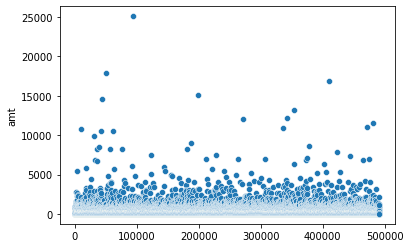

In [33]:
# amt 디테일 보자
# 분포 한번 확인
sns.scatterplot(data=cc_df, x=cc_df.index, y='amt')

In [34]:
# 확실히 max 값이 눈에 확 튀기는 한다.
# 그럼 한번 15000 이상인 값들을 파보자

cc_df[cc_df['amt'] >= 15000]

,trans_time,cc_num,amt,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,trans_hour,trans_day,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,age
49446,2019-04-07 15:32:23,6538441737335434,17897.24,41.3851,-80.1752,606,1997-09-22,41.361042,-79.665772,0,15,6,0,0,0,0,0,0,0,0,0,0,0,0,1,0,21
93045,2019-06-14 20:15:38,5540636818935089,25086.94,42.6911,-71.1605,76383,1985-04-04,42.397174,-71.474163,0,20,4,0,0,0,0,0,0,0,0,0,0,0,0,1,1,34
198719,2019-11-17 20:00:17,2264937662466770,15047.03,29.3641,-98.4924,1595797,1995-10-17,29.849413,-98.224021,0,20,6,0,0,0,0,0,0,0,0,0,0,0,0,1,1,24
410031,2020-09-21 12:02:00,3566094707272327,16837.08,34.3795,-118.5230,34882,1971-04-25,35.111725,-118.128435,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,49


In [35]:
# 근데 전부 fraud 거래는 아니네.
# 뭔데 이렇게 비싸지? 하고 다른 컬럼을 보다가 카테고리를 확인하니 4개 row 모두 travel 임.
# 아 이해가 되네. 가족끼리 휴가로 유럽이라도 가나봄.
# 그럼 이건 이상치로 간주해서 처리하지는 못할 것 같음. 여행 카테고리에서 가치가 있는 데이터니까.
# 대신 학습할 때 모델 왜곡되는거 막기 위해서 로그 씌우거나 뭐 처리를 해야겠음.

In [36]:
# 이제 위도 / 경도 값으로 새로운 변수 만들어줘야 함.
# 이거는 LMS에서 알려준 대로 따라하자

# 거리 계산에 필요한 geopy 라이브러리를 설치합니다.
!pip install geopy

In [37]:
from geopy.distance import distance

In [38]:
# distance 컬럼 새로 만들어서 고객 위치와 거래처 위치의 거리를 구하자.
# 퍼실님이 말한대로 20분 걸린다고 하니 기다려보자. see you soon.

cc_df['distance'] = cc_df.apply(lambda x: distance((x['lat'], x['long']), (x['merch_lat'], x['merch_long'])).km, axis = 1)

In [39]:
cc_df.head()

,trans_time,cc_num,amt,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,trans_hour,trans_day,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,age,distance
0,2019-01-01 00:00:44,630423337322,107.23,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,40,30.216618
1,2019-01-01 00:12:34,4956828990005111019,44.71,40.6747,-74.2239,124967,1980-12-21,40.079588,-74.848087,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,38,84.714605
2,2019-01-01 00:17:16,180048185037117,46.28,40.6152,-74.4150,71485,1974-07-19,40.021888,-74.228188,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,44,67.768167
3,2019-01-01 00:20:15,374930071163758,64.09,42.2203,-83.3583,31515,1971-11-05,42.360426,-83.552316,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,47,22.322745
4,2019-01-01 00:23:41,2712209726293386,25.58,30.4066,-91.1468,378909,1977-02-22,29.737426,-90.853194,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,41,79.398244


In [40]:
# 고객 별로 그룹핑해서 소비금액 관련 변수를 만들어주자
# 만드는 이유: 예를 들어 보통 50~100불 쓰던 사람이 갑자기 5000불 거래 건이 생기면 아웃라이어로 인식할 수 있게끔
# 고객의 평균 소비금액 대비 이 건의 거래금액의 비율로 정의

cc_df['amt_ratio'] = cc_df['amt'] / cc_df.groupby('cc_num')['amt'].transform('mean')

In [41]:
cc_df.head()

,trans_time,cc_num,amt,lat,long,city_pop,dob,merch_lat,merch_long,is_fraud,trans_hour,trans_day,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,age,distance,amt_ratio
0,2019-01-01 00:00:44,630423337322,107.23,48.8878,-118.2105,149,1978-06-21,49.159047,-118.186462,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,40,30.216618,1.912154
1,2019-01-01 00:12:34,4956828990005111019,44.71,40.6747,-74.2239,124967,1980-12-21,40.079588,-74.848087,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,38,84.714605,0.746934
2,2019-01-01 00:17:16,180048185037117,46.28,40.6152,-74.4150,71485,1974-07-19,40.021888,-74.228188,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,44,67.768167,0.529956
3,2019-01-01 00:20:15,374930071163758,64.09,42.2203,-83.3583,31515,1971-11-05,42.360426,-83.552316,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,47,22.322745,0.996458
4,2019-01-01 00:23:41,2712209726293386,25.58,30.4066,-91.1468,378909,1977-02-22,29.737426,-90.853194,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,41,79.398244,0.281882


In [42]:
# 정상 건과 사기 건의 amt_ratio 분포를 살펴보자

cc_df.groupby('is_fraud')['amt_ratio'].describe()

# 정상 거래는 평균이 1인 반면, 사기 거래는 평균이 7.7 정도에 편차도 훨씬 큼..
# 이 컬럼으로 학습해도 유의미한 결과 발견할 수 있을 듯.

,count,mean,std,min,25%,50%,75%,max
is_fraud,,,,,,,,
0,489890.0,0.983033,2.407166,0.010731,0.144111,0.605379,1.219116,357.764200
1,1244.0,7.681624,6.670278,0.071826,0.388318,5.776714,13.629268,24.738782


In [43]:
# 이제 아까 생각했던 대로, amt값에 로그를 씌워줘서 왜곡을 방지하자

cc_df['amt'] = np.log1p(cc_df['amt'])

In [44]:
# 추가 feature 고민
# 사기 거래의 전형적인 패턴 중 하나가 짧은 시간 안에 연쇄적으로 결제가 되는 형태라고 하는데
# 한 고객의 거래 시간의 차이를 구하면 학습에 도움이 될 수도 있어보인다

cc_df = cc_df.sort_values(['cc_num', 'trans_time'])
cc_df['trans_gap'] = cc_df.groupby('cc_num')['trans_time'].diff().dt.total_seconds().fillna(0)

# 고객 id로 그룹바이 해서 transtime을 본다
# .diff로 transtime 간의 갭을 계산하게 한다
# 단위는 초 단위로 해야 사기거래 패턴 찾기에 유용해 보임 (그래서 dt.total_seconds() 써줌)
# 결측치(첫 거래)는 0으로 채워 숫자형태 유지.

In [45]:
# 이제 다시 필요 없는 컬럼들을 솎아내주자

# trans_time : trans_hour, trans_day, trans_gap을 만들었으니 필요 없어보임
# lat, long, merch_lat, merch_long : distance 만들었으니 필요 없어 보임
# dob : age 컬럼 만들었으니 필요 없어 보임

drop_columns = ['trans_time', 'lat', 'long', 'merch_lat', 'merch_long', 'dob']
cc_df.drop(columns = drop_columns, inplace = True)

In [46]:
# 데이터셋 다시 훑기

cc_df.head()

,cc_num,amt,city_pop,is_fraud,trans_hour,trans_day,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_M,age,distance,amt_ratio,trans_gap
55,503874407318,4.172694,1595797,0,4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,43,126.631369,1.060355,0.0
238,503874407318,3.731699,1595797,0,14,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,43,68.065664,0.676310,34767.0
502,503874407318,4.670771,1595797,0,20,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,43,98.425384,1.755585,23724.0
529,503874407318,4.539458,1595797,0,21,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,43,45.569536,1.537506,2052.0
709,503874407318,3.382015,1595797,0,11,2,0,0,1,0,0,0,0,0,0,0,0,0,0,1,43,93.387205,0.471841,51910.0
